In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/content/Fish.csv')

In [3]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
df['Length']=(df['Length1']+df['Length2']+df['Length3'])/3

In [8]:
df=df.drop(['Length1','Length2','Length3'],axis=1)

In [10]:
df.head()

,Species,Weight,Height,Width,Length
0,Bream,242.0,11.5200,4.0200,26.200000
1,Bream,290.0,12.4800,4.3056,27.166667
2,Bream,340.0,12.3778,4.6961,27.166667
3,Bream,363.0,12.7300,4.4555,29.600000
4,Bream,430.0,12.4440,5.1340,29.833333


In [13]:
x=df.iloc[:,1:5]
y=df.iloc[:,0]

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
model=KNeighborsClassifier(n_neighbors=3,metric='euclidean')

model.fit(x,y)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [19]:
model.score(x,y)

0.7610062893081762

In [33]:
sample=np.array([[190,12,4.33,7.1666]])

In [34]:
model.predict(sample)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Parkki'], dtype=object)

##How to find the value of k ?

In [21]:
scores=[]
for k in range(1,30):
  knn=KNeighborsClassifier(k).fit(x,y)
  scores.append(knn.score(x,y))

In [23]:
print(scores)

[1.0, 0.8176100628930818, 0.7610062893081762, 0.6918238993710691, 0.6918238993710691, 0.660377358490566, 0.660377358490566, 0.610062893081761, 0.5911949685534591, 0.5723270440251572, 0.5534591194968553, 0.5283018867924528, 0.5471698113207547, 0.5283018867924528, 0.5534591194968553, 0.5723270440251572, 0.5471698113207547, 0.5345911949685535, 0.5345911949685535, 0.5157232704402516, 0.5220125786163522, 0.5220125786163522, 0.5283018867924528, 0.5094339622641509, 0.5157232704402516, 0.5031446540880503, 0.5157232704402516, 0.5408805031446541, 0.5471698113207547]


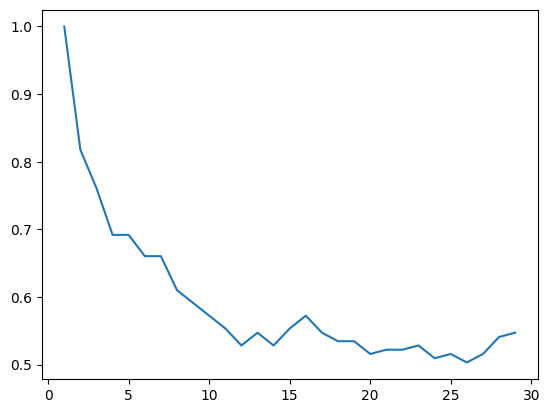

In [24]:
plt.plot(np.arange(1,30),scores)